In [5]:
#import requests
#from bs4 import BeautifulSoup as bs
import pandas as pd
from datetime import datetime, timedelta

In [4]:
!pip install pandas

     ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
      --------------------------------------- 0.2/10.7 MB 4.8 MB/s eta 0:00:03
     - -------------------------------------- 0.5/10.7 MB 5.6 MB/s eta 0:00:02
     -- ------------------------------------- 0.7/10.7 MB 5.9 MB/s eta 0:00:02
     --- ------------------------------------ 1.0/10.7 MB 5.6 MB/s eta 0:00:02
     ---- ----------------------------------- 1.2/10.7 MB 5.7 MB/s eta 0:00:02
     ----- ---------------------------------- 1.5/10.7 MB 5.7 MB/s eta 0:00:02
     ------ --------------------------------- 1.8/10.7 MB 5.6 MB/s eta 0:00:02
     ------- -------------------------------- 2.1/10.7 MB 5.8 MB/s eta 0:00:02
     -------- ------------------------------- 2.4/10.7 MB 5.8 MB/s eta 0:00:02
     ---------- ----------------------------- 2.7/10.7 MB 5.9 MB/s eta 0:00:02
     ----------- ---------------------------- 3.0/10.7 MB 5.9 MB/s eta 0:00:02
     ------------ --------------------------- 3.2/10.7 MB 5


[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: C:\Users\Ìù¨Ï§Ä\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
!pip install selenium

     ---------------------------------------- 0.0/6.5 MB ? eta -:--:--
      --------------------------------------- 0.1/6.5 MB 2.6 MB/s eta 0:00:03
     - -------------------------------------- 0.3/6.5 MB 4.3 MB/s eta 0:00:02
     --- ------------------------------------ 0.6/6.5 MB 4.3 MB/s eta 0:00:02
     ---- ----------------------------------- 0.8/6.5 MB 4.5 MB/s eta 0:00:02
     ------ --------------------------------- 1.0/6.5 MB 4.9 MB/s eta 0:00:02
     ------- -------------------------------- 1.2/6.5 MB 4.8 MB/s eta 0:00:02
     -------- ------------------------------- 1.4/6.5 MB 4.7 MB/s eta 0:00:02
     --------- ------------------------------ 1.6/6.5 MB 4.6 MB/s eta 0:00:02
     ---------- ----------------------------- 1.8/6.5 MB 4.8 MB/s eta 0:00:02
     ----------- ---------------------------- 1.9/6.5 MB 4.4 MB/s eta 0:00:02
     ------------- -------------------------- 2.2/6.5 MB 4.5 MB/s eta 0:00:01
     -------------- ------------------------- 2.4/6.5 MB 4.4 MB/s eta 0


[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: C:\Users\Ìù¨Ï§Ä\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
page = requests.get("https://heestogram.github.io/categories/#page-title")
soup = bs(page.text, "html.parser")
soup = soup.find(class_="archive")

In [3]:
dict_ = {}
title_list = []
date_list = []
category_list = []
summary_list = []
num_of_posts = len(soup.find_all(class_='archive__item-title no_toc'))

for i in range(num_of_posts):
    step1 = soup.find_all(class_='archive__item-title no_toc')[i]
    step2 = step1.find('a').text[:-1]
    title_list.append(step2)
    
    step1 = soup.find_all(class_='archive__item-excerpt')[2*i].text
    
    date_list.append(datetime.strptime(step1.split()[0], '%m/%d/%Y').strftime("%Y-%m-%d"))
    category_list.append(step1.split()[1])
    
    step1 = soup.find_all(itemprop='description')[i].text[:-1]
    summary_list.append(step1)
    
dict_['title'] = title_list
dict_['date'] = date_list
dict_['category'] = category_list
dict_['summary'] = summary_list

In [4]:
df_ = pd.DataFrame(dict_)

<AxesSubplot:>

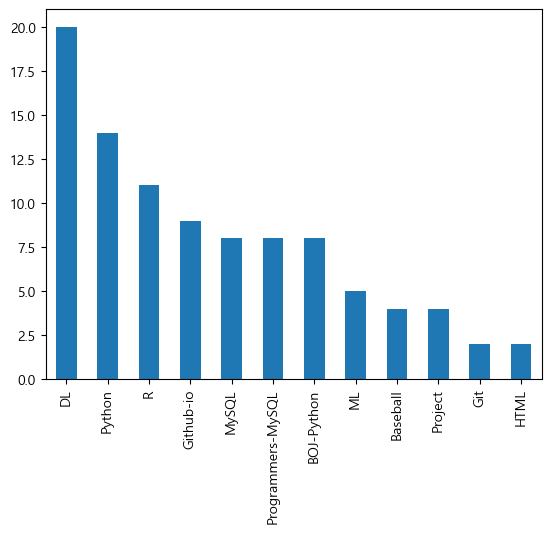

In [8]:
import matplotlib

matplotlib.rcParams['font.family'] ='Malgun Gothic'

matplotlib.rcParams['axes.unicode_minus'] =False

df_['category'].value_counts().plot.bar()

In [8]:
df_.to_csv('github_blog_crawling.csv', encoding='euc-kr')

In [25]:
page = requests.get("https://github.com/heestogram")
soup = bs(page.text, "html.parser")
soup = soup.find_all(class_="ContributionCalendar-day")

In [37]:
text_list = []
date_list = []
dict_ = {}
length = len(soup)
for i in range(length):
    text_list.append(soup[i].text)
    try:
        date_list.append(soup[i]['data-date'])
    except KeyError:
        date_list.append('no date')

In [38]:
dict_['date']=date_list
dict_['contribution']=text_list
df_commit = pd.DataFrame(dict_)

date                                   contribution
0    2022-03-27     No contributions on Sunday, March 27, 2022
1    2022-03-28     No contributions on Monday, March 28, 2022
2    2022-03-29    No contributions on Tuesday, March 29, 2022
3    2022-03-30  No contributions on Wednesday, March 30, 2022
4    2022-03-31   No contributions on Thursday, March 31, 2022
..          ...                                            ...
371     no date                                               
372     no date                                               
373     no date                                               
374     no date                                               
375     no date                                               

[376 rows x 2 columns]

In [45]:
df_commit = df_commit[df_commit.date != 'no date']

date                                   contribution
0    2022-03-27     No contributions on Sunday, March 27, 2022
1    2022-03-28     No contributions on Monday, March 28, 2022
2    2022-03-29    No contributions on Tuesday, March 29, 2022
3    2022-03-30  No contributions on Wednesday, March 30, 2022
4    2022-03-31   No contributions on Thursday, March 31, 2022
..          ...                                            ...
366  2023-03-28    No contributions on Tuesday, March 28, 2023
367  2023-03-29  No contributions on Wednesday, March 29, 2023
368  2023-03-30     1 contribution on Thursday, March 30, 2023
369  2023-03-31     11 contributions on Friday, March 31, 2023
370  2023-04-01    No contributions on Saturday, April 1, 2023

[371 rows x 2 columns]

In [47]:
df_commit['date'] = pd.to_datetime(df_commit['date'])

C:\Users\Ìù¨Ï§Ä\AppData\Local\Temp\ipykernel_25104\184324504.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_commit['date'] = pd.to_datetime(df_commit['date'])


In [66]:
df_commit.to_csv('github_commit_crawling.csv')

In [6]:
## ÏóêÎ∏åÎ¶¨ÌÉÄÏûÑ ÌÅ¨Î°§ÎßÅ

from selenium import webdriver
from selenium.webdriver.common.by import By

In [8]:
# ÏóêÎ∏åÎ¶¨ÌÉÄÏûÑ Î°úÍ∑∏Ïù∏ ÌïòÎäî Í≥ºÏ†ï

driver = webdriver.Chrome(executable_path = "D:/heejun/dev/chromedriver.exe")
driver.implicitly_wait(1)
driver.get('https://everytime.kr/login')
driver.find_element(By.NAME,'userid').send_keys('anthjoon11')
driver.find_element(By.NAME,'password').send_keys('clckflxh00!')
#driver.find_element(By.XPATH,'//*[@class="submit"]/input').click()
driver.implicitly_wait(1)

C:\Users\Ìù¨Ï§Ä\AppData\Local\Temp\ipykernel_21048\3033406170.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path = "D:/heejun/dev/chromedriver.exe")


In [9]:
# ÏóêÎ∏åÎ¶¨ÌÉÄÏûÑ ÌÅ¨Î°§ÎßÅ
dictionary={} # ÌÅ¨Î°§ÎßÅÌïú textÎì§ÏùÑ Îã¥Í∏∞ ÏúÑÌïú dictionary
page = 0 #ÌéòÏù¥ÏßÄ ÏàúÌôòÏùÑ ÏúÑÌïú count num

content_=[] # Í∏Ä Î≥∏Î¨∏ Îã¥ÏùÑ Î¶¨Ïä§Ìä∏
comment_=[] # ÎåìÍ∏Ä Îã¥ÏùÑ Î¶¨Ïä§Ìä∏
like_=[] # Ï¢ãÏïÑÏöî Ïàò Îã¥ÏùÑ Î¶¨Ïä§Ìä∏
comment_count_=[] # ÎåìÍ∏Ä Ïàò Îã¥ÏùÑ Î¶¨Ïä§Ìä∏
scrap_=[] # Ïä§ÌÅ¨Îû© Ïàò Îã¥ÏùÑ Î¶¨Ïä§Ìä∏
time_=[]

while True:
    print('page '+str(page))
    
    if page > 0:
        break

    page = page+1
    
    board = ['370507','385968'] # Ï∑®ÏóÖ,ÏßÑÎ°ú Í≤åÏãúÌåêÍ≥º Ï°∏ÏóÖÏÉù Í≤åÏãúÌåê ÏΩîÎìú
    for num in board: # Îëê Í≤åÏãúÌåêÏùÑ ÏàúÌöå
        driver.get("https://everytime.kr/{}/p/{}".format(num, str(page)))
        driver.implicitly_wait(1)
        
        # Í≤åÏãúÎ¨ºÏóê Ìï¥ÎãπÌïòÎäî ÌÅ¥ÎûòÏä§Îì§ÏùÑ Ï∂îÏ∂ú
        posts = driver.find_elements(By.CSS_SELECTOR, 'article > a.article')
        # Ìï¥Îãπ ÌÅ¥ÎûòÏä§Îì§Ïùò ÎßÅÌÅ¨Îì§ÏùÑ Ï∂îÏ∂ú
        links = [post.get_attribute('href') for post in posts]

        # Î™®ÏïÑÎÜìÏùÄ ÎßÅÌÅ¨Îì§ÏùÑ ÏàúÌöå(=Í∞Å Í≤åÏãúÎ¨ºÏóê Îì§Ïñ¥Í∞ÄÏÑú Ï†ïÎ≥¥Îì§ Ï∂îÏ∂ú)
        for link in links:
            driver.get(link)
            comment_list = []
            texts = driver.find_elements(By.CSS_SELECTOR, 'p.large')
            
            title_text= driver.find_element(By.CSS_SELECTOR, 'h2.large').text

            like_.append(driver.find_element(By.CSS_SELECTOR, 'li.vote').text)
            comment_count_.append(driver.find_element(By.CSS_SELECTOR, 'li.comment').text)
            scrap_.append(driver.find_element(By.CSS_SELECTOR, 'li.scrap').text)
            time_.append(driver.find_element(By.CSS_SELECTOR, 'time.large').text)

            i = 0
            for comment in texts:
                if i==0:
                    content_.append(title_text+' '+comment.text)
                else:
                    comment_list.append(comment.text)
                i=i+1

            comment_.append(comment_list)

page 0
page 1


In [16]:
# ÏóêÎ∏åÎ¶¨ÌÉÄÏûÑ ÌÅ¨Î°§ÎßÅ
dictionary={} # ÌÅ¨Î°§ÎßÅÌïú textÎì§ÏùÑ Îã¥Í∏∞ ÏúÑÌïú dictionary
page = 0 #ÌéòÏù¥ÏßÄ ÏàúÌôòÏùÑ ÏúÑÌïú count num

content_=[] # Í∏Ä Î≥∏Î¨∏ Îã¥ÏùÑ Î¶¨Ïä§Ìä∏
comment_=[] # ÎåìÍ∏Ä Îã¥ÏùÑ Î¶¨Ïä§Ìä∏
like_=[] # Ï¢ãÏïÑÏöî Ïàò Îã¥ÏùÑ Î¶¨Ïä§Ìä∏
comment_count_=[] # ÎåìÍ∏Ä Ïàò Îã¥ÏùÑ Î¶¨Ïä§Ìä∏
scrap_=[] # Ïä§ÌÅ¨Îû© Ïàò Îã¥ÏùÑ Î¶¨Ïä§Ìä∏
time_=[]

while True:
    print('page '+str(page))
    
    if page > 365:
        break

    page = page+1
    
    driver.get("https://everytime.kr/hotarticle/p/{}".format(str(page)))
    driver.implicitly_wait(1)

    # Í≤åÏãúÎ¨ºÏóê Ìï¥ÎãπÌïòÎäî ÌÅ¥ÎûòÏä§Îì§ÏùÑ Ï∂îÏ∂ú
    posts = driver.find_elements(By.CSS_SELECTOR, 'article > a.article')
    # Ìï¥Îãπ ÌÅ¥ÎûòÏä§Îì§Ïùò ÎßÅÌÅ¨Îì§ÏùÑ Ï∂îÏ∂ú
    links = [post.get_attribute('href') for post in posts]

    # Î™®ÏïÑÎÜìÏùÄ ÎßÅÌÅ¨Îì§ÏùÑ ÏàúÌöå(=Í∞Å Í≤åÏãúÎ¨ºÏóê Îì§Ïñ¥Í∞ÄÏÑú Ï†ïÎ≥¥Îì§ Ï∂îÏ∂ú)
    for link in links:
        driver.get(link)
        comment_list = []
        texts = driver.find_elements(By.CSS_SELECTOR, 'p.large')

        title_text= driver.find_element(By.CSS_SELECTOR, 'h2.large').text

        like_.append(driver.find_element(By.CSS_SELECTOR, 'li.vote').text)
        comment_count_.append(driver.find_element(By.CSS_SELECTOR, 'li.comment').text)
        scrap_.append(driver.find_element(By.CSS_SELECTOR, 'li.scrap').text)
        time_.append(driver.find_element(By.CSS_SELECTOR, 'time.large').text)

        i = 0
        for comment in texts:
            if i==0:
                content_.append(title_text+' '+comment.text)
            else:
                comment_list.append(comment.text)
            i=i+1

        comment_.append(comment_list)

page 0
page 1
page 2
page 3
page 4
page 5
page 6
page 7
page 8
page 9
page 10
page 11
page 12
page 13
page 14
page 15
page 16
page 17
page 18
page 19
page 20
page 21
page 22
page 23
page 24
page 25
page 26
page 27
page 28
page 29
page 30
page 31
page 32
page 33
page 34
page 35
page 36
page 37
page 38
page 39
page 40
page 41
page 42
page 43
page 44
page 45
page 46
page 47
page 48
page 49
page 50
page 51
page 52
page 53
page 54
page 55
page 56
page 57
page 58
page 59
page 60
page 61
page 62
page 63
page 64
page 65
page 66
page 67
page 68
page 69
page 70
page 71
page 72
page 73
page 74
page 75
page 76
page 77
page 78
page 79
page 80
page 81
page 82
page 83
page 84
page 85
page 86
page 87
page 88
page 89
page 90
page 91
page 92
page 93
page 94
page 95
page 96
page 97
page 98
page 99
page 100
page 101
page 102
page 103
page 104
page 105
page 106
page 107
page 108
page 109
page 110
page 111
page 112
page 113
page 114
page 115
page 116
page 117
page 118
page 119
page 120
page 121
page 122
pag

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2.large"}
  (Session info: chrome=112.0.5615.138)
Stacktrace:
Backtrace:
	(No symbol) [0x008EDCE3]
	(No symbol) [0x008839D1]
	(No symbol) [0x00794DA8]
	(No symbol) [0x007C019F]
	(No symbol) [0x007C03AB]
	(No symbol) [0x007EEE62]
	(No symbol) [0x007DAF14]
	(No symbol) [0x007ED57C]
	(No symbol) [0x007DACC6]
	(No symbol) [0x007B6F68]
	(No symbol) [0x007B80CD]
	GetHandleVerifier [0x00B63832+2506274]
	GetHandleVerifier [0x00B99794+2727300]
	GetHandleVerifier [0x00B9E36C+2746716]
	GetHandleVerifier [0x00996690+617600]
	(No symbol) [0x0088C712]
	(No symbol) [0x00891FF8]
	(No symbol) [0x008920DB]
	(No symbol) [0x0089C63B]
	BaseThreadInitThunk [0x75DC7D49+25]
	RtlInitializeExceptionChain [0x770FB74B+107]
	RtlClearBits [0x770FB6CF+191]


In [11]:
def make_df():
    dictionary['content']=content_
    dictionary['comment']=comment_
    dictionary['like']=like_
    dictionary['comment_count']=comment_count_
    dictionary['scrap']=scrap_
    dictionary['date']=time_
    df = pd.DataFrame(dictionary)
    return df

In [190]:
content_[2664]

' Ìï´Í≤å Í∞úÏö¥ÏÇ¨Í∏∏ Í∞ïÏïÑÏßÄÏûÖÎãàÎã§!\nÏïÑÍ∏∞ Í∞ïÏïÑÏßÄÍ∞Ä Í≤¨ÎîîÍ∏∞ÏóêÎäî ÌûòÎì† ÎÇ†Ïî®Ïù¥Í∏∞Ïóê ÏûÑÏãúÎ°ú Îç∞Î†§Ïò§Í≤å ÎêòÏóàÏäµÎãàÎã§. ÌïòÏßÄÎßå Í∞ïÏïÑÏßÄÎ•º Ïò§Îûú Í∏∞Í∞Ñ ÏûÑÎ≥¥ÌïòÍ±∞ÎÇò Îß°ÏïÑÏÑú ÌÇ§Ïö∏ ÌòïÌé∏ÏùÄ ÎêòÏßÄ ÏïäÍ∏∞ ÎïåÎ¨∏Ïóê Ïó¨Îü¨Î∂ÑÎì§Ïùò ÎèÑÏõÄÏù¥ ÌïÑÏöîÌïòÏó¨ Í∏ÄÏùÑ ÏûëÏÑ±ÌïòÏòÄÏäµÎãàÎã§.. Ïò§Îäò Î∞§ÏùÄ ÎÑàÎ¨¥ Ï∂îÏö∏ Í≤É Í∞ôÏïÑ ÏÇ¨Ï†ï Îî∞ÏßÄÏßÄ ÏïäÍ≥† Ïö∞ÏÑ† Îç∞Î†§ÏôîÏßÄÎßå, ÌïòÎ£® Ïù¥ÌãÄ Ïù¥ÏÉÅÏùÄ Ïñ¥Î†§Ïö∏ Í≤É Í∞ôÏäµÎãàÎã§..\nÌòπÏãú Í∞ïÏïÑÏßÄÎ•º ÏûÑÎ≥¥Ìï¥Ï£ºÏã§ Ïàò ÏûàÎäî Î∂ÑÏù¥ Í≥ÑÏãúÎã§Î©¥ Íº≠ Ïó∞ÎùΩÏ£ºÏãúÍ∏∏ Î∞îÎùºÍ≤†ÏäµÎãàÎã§!'

In [193]:
comment_[2665]

['ÏûêÍ≤åÏóê Ïò¨Î¶¨ÎäîÍ≤å ÏÇ¨ÎûåÎì§ ÎßéÏù¥Î≥¥Í≥† Ï¢ãÏùÑ Í≤É Í∞ôÏïÑÏöî!',
 'Í≥†ÌååÏä§ÏóêÎèÑ Ïò¨Î†§Ï£ºÏÑ∏Ïöî',
 'ÎÑàÎ¨¥ÎÑàÎ¨¥ Ïù¥ÏÅòÎã§....',
 'Ïã¨ÏÑ±Ïù¥ Í≥†Ïö∞ÏãúÎã§ Ïò¨ÎùºÍ∞ÄÏã≠Ïáº Ìï´Í≤åÎ°ú',
 '„Ö†„Ö†ÎÑàÎ¨¥Í∑ÄÏóΩÎã§',
 'ÏïÑÍ∏∞ Î∞ú ÏÇ¨Ïù¥Ï¶à Ï¢Ä Î≥¥Ïó¨Ï£ºÏã§ Ïàò ÏûàÎÇòÏöî?',
 'ÏïÑÍµ¨ Í∑ÄÏó¨ÏõåÎùº„Ö†„Ö†„Ö† ÏßÑÏßú ÏÇ¨Ï†ïÎßå ÎêòÎ©¥ ÏûÑÎ≥¥ÌïòÍ≥†Ïã∂ÎÑ§Ïöî...„Öú„Öú',
 'Ìóâ„Öú„Öú ÏßÑÏßú Î≥µÎ∞õÏúºÏã§Í±∞ÏòàÏöî!! ÌïòÎ£®ÎùºÎèÑ Í∞ïÏïÑÏßÄÌïúÌÖåÎäî Îî∞ÎúªÌïú Î∞§Ïù¥ ÎêòÍ≤†ÎÑ§Ïöî Í∞êÏÇ¨Ìï©ÎãàÎã§\U0001faf6üèª',
 'ÌîÑÎ¶∞Ìä∏ Ïπ¥Ìéò Í≥†ÎåÄ ÌõÑÎ¨∏Ï†ê ÏòÜ 24ÏãúÍ∞Ñ Í∞ÑÏãù Ïπ¥ÌéòÏóê Í∞ïÏïÑÏßÄ Í∞ÑÏãù ÌåîÏïÑÏö© „Ö†„Ö† Ìé∏ÏùòÏ†êÏóêÎèÑ ÌåîÍµ¨ „Ö†„Ö† ÏïÑÍ≥† Ïï†Í∏∞Í∞Ä ÎÑàÎ¨¥ Îî±ÌïòÎÑ§Ïöî „Ö†„Ö†„Ö† ÏûëÏÑ±ÏûêÎãòÎèÑ ÏßÑÏßú Ï≤úÏÇ¨ÎÑ§Ïöî „Ö†„Ö†',
 '24ÏãúÍ∞Ñ Í∞ÑÏãù Ïπ¥ÌéòÍ∞Ä ÏûàÏñ¥???',
 'Í∞ÑÏãùÏπ¥ÌéòÎùºÍ∏∞Î≥¥Îã§ ÌÅ∞ ÏïÑÏù¥Ïä§ÌÅ¨Î¶ºÌï†Ïù∏Ï†ê ÏÉùÍ∞ÅÌïòÏãúÎ©¥ÎèºÏöî..',
 'Ï£ºÏù∏ ÏûàÎäî Í∞ïÏïÑÏßÄ ÏïÑÎãàÏóêÏöî??',
 'ÏïÑÎäî Í∞ïÏïÑÏßÄÏÑ∏Ïöî?',
 'ÏÇ¨ÏßÑ Ï¢Ä Îçî Ï£ºÏÑ∏Ïöî',
 'ÏÇ¨ÏßÑ Îçî Ïò¨Î†§Ï£ºÏÑ∏Ïöî „Ö†„Ö†„Ö†',
 'ÏûÑÎ≥¥ Îß°ÏïÑ

In [197]:
len(comment_)

4631

In [195]:
del scrap_[2664]
del time_[2664]
del comment_count_[2664]
del comment_[2664]
del like_[2664]

In [198]:
# Ïò¨Ìï¥Í≤åÏãúÍ∏ÄÏùÄ Ïó∞ÎèÑ ÏóÜÏù¥ ÎÇ†ÏßúÏôÄ ÏãúÍ∞ÑÎßå Ïò¨ÎùºÏò§Í≥†,
# 1ÎÖÑ Ï†Ñ Í≤åÏãúÍ∏ÄÏùÄ Ïó∞ÎèÑÏôÄ ÎÇ†Ïßú, ÏãúÍ∞ÑÏù¥ Í∞ôÏù¥ Ïò¨ÎùºÏò§ÎØÄÎ°ú Ïù¥Î•º ÌÜµÏùºÌïòÍ∏∞ ÏúÑÌïú Ìï®Ïàò
def date_preprocess(df):
    for i in range(len(df)):
        if len(df['date'][i])==11:
            df['date'][i]=df['date'][i][:5]+'/23'
        else: 
            df['date'][i]=df['date'][i][3:8]+'/'+df['date'][i][:2]
    df['date'] = pd.to_datetime(df['date'])
    return df

In [199]:
df_csv = date_preprocess(make_df())

C:\Users\Ìù¨Ï§Ä\AppData\Local\Temp\ipykernel_21048\676619808.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


In [200]:
df_csv.tail(30)

content   
4601   Ïó¨ÏπúÏù¥ Í∞ëÏûêÍ∏∞ ÎÇòÎûë Îñ®Ïñ¥Ï†∏ ÏïâÎçîÎãà ÏÖÄÏπ¥ Îßâ ÏòàÏÅú ÌëúÏ†ï ÏßìÍ≥† Ï∞çÎçîÎãà Ïπ¥ÌÜ°ÏúºÎ°ú ÎàÑÍµ¨Ìïú...  \
4602   ÎÇ®Ïûê: ÎáåÏÑ±ÎßàÎπÑ ÌõÑÏú†Ï¶ù ÏûàÏñ¥ÎèÑ Íµ∞ÎåÄ ÎÅåÍ≥†Í∞ê\nÏó¨Ïûê: ÌîºÏßÄÏª¨ ÏÉÅÏúÑ 0.0001%ÎèÑ ...   
4603             ÏïÑÍ∏∞Ìò∏ÎûëÏù¥ Îç∞Î†§Í∞ÄÏÑ∏ÏöîüêØ „Ö†„Ö† ÏïàÏïîÏó≠ 3Ï∂úÏóê Ï£ºÏù∏ ÏûÉÏùÄ Ìò∏ÎûëÏù¥ ÏûàÏäµÎãàÎã§   
4604   ÏòÅÏõêÌïú Ï°∞ÏÑ†Ïùò 4Î≤à ÌÉÄÏûê NO.10 Ïù¥ÎåÄÌò∏\nÏùÄÌá¥ÏãùÎÇ† Ìà¨Ïàò Îç∞Î∑î+ÌôÄÎìú+2Î£®ÌÉÄ+ÌÉÄÏ†ê...   
4605  (Í≥µÍµ¨x)ÌòπÏãúÎÇò Ìï¥ÏÑú Ïò¨Î†§Î≥¥Îäî ÌõÑÎ¶¨Ïä§ ÎîîÏûêÏù∏ ÌïòÏ∞ÆÏùÄ Ìò∏ÎûëÏù¥ÎèÑ Í∑ÄÏóΩÏßÄÎßå Ïù¥Îü∞ Í≤ÉÎèÑ Íπî...   
4606   Ïñ¥ÎñªÍ≤å Ïö∞Î¶¨Í∞Ä Ïù¥ ÏÑ†ÏàòÎ•º Î≥¥ÎÇº Ïàò ÏûàÏùÑÍπåÏöî\nÏù¥Îü∞ ÌÉÄÏûêÍ∞Ä ÏûàÏäµÎãàÎã§\nÎ°ØÎç∞Ïùò ÏòÅÏõêÌïú...   
4607   SPORTS KU X ÏºÄÏù¥Ïú†ÌîÑÎ†åÏ¶à 2022 Ï†ïÍ∏∞Ï†Ñ ÏùëÏõêÏö©Ìíà ÌäπÍ∞Ä ÌåêÎß§ ÏïàÎÇ¥\n\n...   
4608                               ÏïºÍµ¨Ïóê ÎÇ≠ÎßåÏùÄ ÏïÑÏßÅ ÏÇ¥ÏïÑÏûàÎäî Í≤É Í∞ôÎã§   
4609   [ÎÑ§Ïù¥Î≤Ñ ÏõçÏä§ Î©îÏùº ÏÉùÏÑ±ÏïàÎÇ¥]\n\nÏïàÎÖïÌïòÏÑ∏Ïöî. ÌïôÏö∞Ïó¨Îü¨Î∂Ñ\n\nÏßÄÎÇúÏ£º ÏõîÏöîÏùºÎ∂ÄÌÑ∞...   
4610                                     ÎåÄÌò∏ÌñÑ Í∑∏ÎèôÏïà ÌñâÎ≥µÌñàÏäµÎãàÎã§   
4611  FEARLESSüèà ÎØ∏ÏãùÏ∂ïÍµ¨Î∂ÄÏóê ÏÉàÎ°úÏö¥ Ïö©Í∏∞Í∞Ä ÎêòÏñ¥Ï§Ñ ÏÇ¨ÎûåÏùÑ Íµ¨ÌïòÍ≥† ÏûàÏäµÎãàÎã§.\n\n...   
4612   ÎÇ¥Í∞Ä ÌïôÏÉùÌöåÏû•Ïù¥ ÎêúÎã§Î©¥ ÍµêÎÇ¥Ïóê Ìù°Ïó∞Î∂ÄÏä§ 100Í∞ú ÎßåÎì§Í±∞Ïïº\n\nÍ±∞Í∏∞ÏóêÏÑú Ïïà ÌîºÍ≥† ...   
4613   ÎÇ®ÏûêÎäî Î∞©ÌÉÑÏ†ïÎèÑ ÎèºÏïºÏßÄÎßå Íµ∞ÎåÄ Î©¥Ï†ú ÌïòÎãà ÎßàÎãà ÌïòÎäîÎç∞ Ïö∞Î¶¨ÎÇòÎùº Ïó¨ÏûêÎì§ÏùÄ ÌÉúÏñ¥ÎÇ†ÎïåÎ∂Ä...   
4614                                            Ïú§ÏÑùÏó¥ ÏÇ¨ÎûëÌï¥   
4615  bts Íµ∞ÎåÄ ÏïàÎ≥¥ÎÇºÍ±∞Î©¥ Ïû¨Î≤å ÏûêÏãùÎì§ÎèÑ ÎπºÏ§òÎùº ÌïúÍµ≠ Í≤ΩÏ†úÎ•º Ïù¥ÎÅåÏñ¥Í∞ÄÎäî Ï§ëÏöîÌïú ÏÇ¨ÎûåÎì§ ...   
4616   Ïñ¥Ï†ú ÎÇòÏßÄÏôÑ ÏùÄÌá¥Ïãù 8ÌöåÎßêÏóê ÎÇòÏôÄÏÑú 1Ïù¥Îãù 3Ïã§Ï†êÏùÑ Ìïú Ï†ÑÏú†Ïàò ÏÑ†ÏàòÎèÑ ÏùÄÌá¥Í≤ΩÍ∏∞ÏòÄÎã§...   
4617                                      Î≤åÏç® ÎààÎ¨ºÎÇòÎäîÎç∞ Ïñ¥Îñ°ÌïòÏßÄ   
4618                          ÌïòÏ∞ÆÏùÄ Ìò∏ÎûëÏù¥ ÌõÑÎ¶¨Ïä§ Í≥µÍµ¨ ÏïàÌïòÎÇòÏöî ÏïàÌïòÎÇòÏöîÏò§   
4619   ü•Å Ï§ëÏïôÎùΩÎ∞¥Îìú ÌÅ¨Î¶ºÏä® 22ÌïôÎ≤à ÎìúÎüº Ï∂îÍ∞Ä Î™®Ïßë ü•Å\n\nÏµúÍ≥†Ïùò Í≥†Î†§ÎåÄÌïôÍµê Ï§ëÏïôÎùΩÎ∞¥...   
4620  Ïä§ÌÇ®Ïä§Ïø†Î≤ÑÎäî ÎèôÎ∞© Ïôú ÏïàÎπºÏöî?? Ï†úÎ™Ö ÎãπÌïúÍ≤å 19ÎÖÑÎèÑÏù∏Îç∞ Î™á ÎÖÑ Ïß∏ ‚ÄúÎ¨¥Îã®Ï†êÍ±∞‚ÄúÏ§ëÏù¥...   
4621    Íµ≠Í∞êÏóêÏÑú BTS ÏäàÍ∞Ä "Íµ∞ÎåÄÎäî ÏïåÏïÑÏÑú Í∞à ÌÖåÎãà" Îì±Ïû• Í∞ÄÏÇ¨ Ï†ÅÏùÄÍ±∞ ÎßéÏù¥ ÌõÑÌöåÌïòÍ∏¥ Ìï†ÎìØ   
4622                                ÌûàÌûà ÏÑúÎ∏åÏõ®Ïù¥ ÎßàÏãØÎã§ Ï≤†Î∂ÑÎèÑ ÌíçÎ∂ÄÌï¥   
4623                Í∞ÄÎßåÎ≥¥Î©¥ Ï†úÏùº ÎßéÏù¥ Îã§ÏπòÎäî Ïù¥Ïú† 1ÏàúÏúÑÍ∞Ä ÌõàÎ†®Ïù¥ ÏïÑÎãàÎùº ÌíãÏÇ¥Ïù¥Ïïº   
4624                      ÎÇò Í±¥ÏÇ¨ÌôòÏù∏Îç∞ Í≥†Ïó∞Ï†ÑÎïå Í≥µÍ∞úÍ≥†Î∞±Ìï® ÏßÑÏßúÌï†Í±∞ÏûÑ ÎßêÎ¶¨ÏßÄÎßà   
4625                         ÎÇ¥Í∞Ä ÏïÑÎäî Î∞ïÏÑ±Í∑ºÎãò ÎßûÎÇòÏöî? Ïù¥Î¶ÑÏù¥ ÏûêÏ£ºÎ≥¥Ïù¥ÏãúÎÑ§   
4626  BTS ÏÜîÏßÅÌûà Í≥µÍ∞êÍ∞ÄÎäîÍ≤å ÎÇòÍ∞ôÏùÄ ÌïôÎ∂ÄÏÉùÎî∞Î¶¨ÎèÑ Íµ∞ÎåÄÍ∞ÄÍ∏∞ Ïã´Ïñ¥ÏÑú Î™∏ ÎπÑÌãÄÍ≥† Ï†ÑÎ¨∏Ïó∞ Í≥†ÎØº...   
4627                              Ï†ÑÏû•Ïó∞Ïù¥ 6Ìò∏ÏÑ†ÎèÑ Í±¥Îì¶ „Öã„Öã„Öã„Öã....   
4628  ÏïÑÎ≤ÑÏßÄÎûë Î≥∏Í∞ÄÏóêÏÑú Ïà† ÌïúÏûî ÌñàÏñ¥ ÎÇòÎäî Ïû¨ÏàòÌïú ÏÉàÎÇ¥Í∏∞Ïù∏Îç∞ ÎÇ¥Í∞Ä Í≥†2Îïå Ïñ¥Î®∏ÎãàÍ∞Ä ÎèåÏïÑÍ∞Ä...   
4629                                   ‚òÜ‚òÜ‚òÜ Ï†ïÏ≤†Ïõê 23ÌôÄÎìú ‚òÜ‚òÜ‚òÜ   
4630  Ïã¨Ïã¨Ìï¥ÏÑú ÎØ∏ÎÅÑÎüºÌãÄ ÎåÄÏó¨Ìï¥Ïò¥ ÌòºÏûê ÏûàÎäîÎç∞ Ïã¨Ïã¨Ìï¥ÏÑú ÎØ∏ÎÅÑÎüºÌãÄ ÎåÄÏó¨Ìï¥ÏôîÏùå „Öã„Öã„Öã„Öã\nÍ∑ºÎç∞...   

                                                comment like comment_count   
4601  [Ìó§Ïñ¥Ïßê?, „Öá„Öá ÎàÑÍµ¨ÎÉêÍ≥† Ìè∞ Î≥ºÎùºÍ∑∏Îü¨ÎãàÍπå Î™∏Ïã∏ÏõÄÌïòÍ≥† ÏÜåÎ¶¨ÏßÄÎ•¥Í≥† Î∞úÎ°úÏ∞®ÎçîÎùº, ÏôÄ.....   41            33  \
4602  [ÎÑ§, ., ÎÑ§, ÏÇ≠Ï†úÎêú ÎåìÍ∏ÄÏûÖÎãàÎã§., „Öã„Öã, „Ñπ„Öá„Öã„ÖãÏßÄÎì§ Ïùº ÏïÑÎãàÎùºÍ≥† Ìïò, „Ñπ„ÖáÌï≠...   96            32   
4603  [Ìò∏ÎûëÏïÑ Ï£ºÏù∏ÏùÑ Íº≠ ÎßåÎÇòÏïºÌïúÎã§~, Ïñ¥Îñ§ Ìï†Î®∏ÎãàÍ∞Ä ÌõîÏ≥êÍ∞ÄÏãúÎçòÎç∞....6, ÎßàÏä§ÏΩîÌä∏ Í∞ô...   24             4   
4604  [ÎßàÏßÄÎßâÍπåÏßÄ ÎèÑÎ£®Îäî ÏïàÌï¥Ï£ºÎÑ§Ïöî..., „Ñπ„Öá, Ìà¨ÏàòÎ°úÍπåÏßÄ ÎÇòÍ∞îÎäîÎç∞ 1Î£®Î°ú Ï∂úÎ£®ÌñàÏúºÎ©¥ ...   30             4   
4605  [ÏûëÎÖÑÏóê ÏÉÄÎäîÎç∞Ïöî ÌöåÍ∑ÄÎ¨ºÏù∏Í∞Ä, ÎòêÏÇ¨ÎèÑÏ¢ãÏïÑ, Î∞îÎ°ú ÏÇΩÎãàÎã§. ÏñºÎßàÏ†

In [202]:
df_csv.to_csv('D:/heejun/everytime_crawling_hot.csv')

In [204]:
df = pd.read_csv('D:/heejun/everytime_crawling_hot.csv')

In [207]:
!pip install textblob

  Using cached textblob-0.17.1-py2.py3-none-any.whl (636 kB)
     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
     ---- ----------------------------------- 0.2/1.5 MB 4.6 MB/s eta 0:00:01
     --------- ------------------------------ 0.4/1.5 MB 4.5 MB/s eta 0:00:01
     -------------- ------------------------- 0.6/1.5 MB 4.4 MB/s eta 0:00:01
     -------------------- ------------------- 0.8/1.5 MB 4.3 MB/s eta 0:00:01
     -------------------------- ------------- 1.0/1.5 MB 4.4 MB/s eta 0:00:01
     ------------------------------- -------- 1.2/1.5 MB 4.4 MB/s eta 0:00:01
     ------------------------------------- -- 1.4/1.5 MB 4.5 MB/s eta 0:00:01
     ---------------------------------------  1.5/1.5 MB 4.3 MB/s eta 0:00:01
     ---------------------------------------- 1.5/1.5 MB 4.0 MB/s eta 0:00:00
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
     ---------------------------------------- 0.0/77.1 kB ? eta -:--:--
     -----------------------------------


[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: C:\Users\Ìù¨Ï§Ä\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [214]:
from textblob import TextBlob
text = df['content'][18]
print(text)
print(TextBlob(text).sentiment)

Ïñ¥Ïù¥, 'Ìô©ÌÉúÏûêÏõêÌÉúÏù∏'. ÏóêÌÉÄ ÎÅÑÍ≥† Í≥µÎ∂ÄÌï¥Îùº
Sentiment(polarity=0.0, subjectivity=0.0)


In [215]:
!pip install konlpy




  Using cached konlpy-0.6.0-py2.py3-none-any.whl (19.4 MB)
  Using cached JPype1-1.4.1-cp310-cp310-win_amd64.whl (345 kB)
  Using cached lxml-4.9.2-cp310-cp310-win_amd64.whl (3.8 MB)



[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: C:\Users\Ìù¨Ï§Ä\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


AttributeError: Java package 'kr.lucypark.okt' is not valid

In [216]:
import re

from konlpy.tag import Okt
okt = Okt()

with open('stopwords_new.txt',  encoding='cp949') as f:
    list_file = f.readlines()
stopwords = list_file[0].split(",")
new_stopwords = ['Ïïå', 'Ïàò', 'Îãò', 'Í≥†']
for word in new_stopwords:
    stopwords.append(word)

AttributeError: Java package 'kr.lucypark.okt' is not valid

In [325]:
def preprocess(raw_text):
    raw_text = re.sub('[1-9-=+,#/\?:^.@*\"‚Äª~„Üç!„Äè‚Äò|\(\)\[\]`\'‚Ä¶„Äã\‚Äù\‚Äú\‚Äô¬∑]', ' ', raw_text)
    text1 = ' '.join(raw_text.split())
    morphs_ = okt.morphs(text1, stem=True)
    remove_stop = [x for x in morphs_ if x not in stopwords]
    remove_one = [x for x in remove_stop if len(x)>1]
    text = " ".join(remove_one)
    return text

In [326]:
df_like_sort = df[df['like']>=5]
df_scrap_sort = df[df['scrap']>=5]
df_like_sort = df_like_sort.reset_index(drop=True)
df_scrap_sort = df_scrap_sort.reset_index(drop=True)

In [327]:
def make_corpus(df_):
    df_len = df_.shape[0]
    word_list = []
    for i in tqdm(range(df_len)):
        word_list.append(preprocess(df_['content'][i]))
    return word_list

In [328]:
# Ï†ÑÏ≤¥ Í≤åÏãúÍ∏ÄÏùò ÎßêÎ≠âÏπòÎ•º ÎßåÎì†Îã§.
wordlist = make_corpus(df) 

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1999/1999 [00:57<00:00, 34.97it/s]


In [329]:
# Ï¢ãÏïÑÏöîÍ∞Ä 5Í∞ú Ïù¥ÏÉÅÏù∏ Í≤åÏãúÍ∏ÄÏùò ÎßêÎ≠âÏπòÎ•º ÎßåÎì†Îã§.
wordlist_like = make_corpus(df_like_sort) 

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 65/65 [00:04<00:00, 15.86it/s]


In [330]:
# Ïä§ÌÅ¨Îû© ÏàòÍ∞Ä 5Í∞ú Ïù¥ÏÉÅÏù∏ Í≤åÏãúÍ∏ÄÏùò ÎßêÎ≠âÏπòÎ•º ÎßåÎì†Îã§.
wordlist_scrap = make_corpus(df_scrap_sort)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 365/365 [00:14<00:00, 24.51it/s]


In [302]:
!pip install WordCloud

     -------------------------------------- 153.1/153.1 kB 3.0 MB/s eta 0:00:00


In [335]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

%matplotlib inline
def displayWordCloud(data = None, backgroundcolor = 'white', width=None, height=None):
    wordcloud = WordCloud(font_path = 'MALGUN_.TTF', 
                          background_color = backgroundcolor, 
                          width = width, 
                          height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

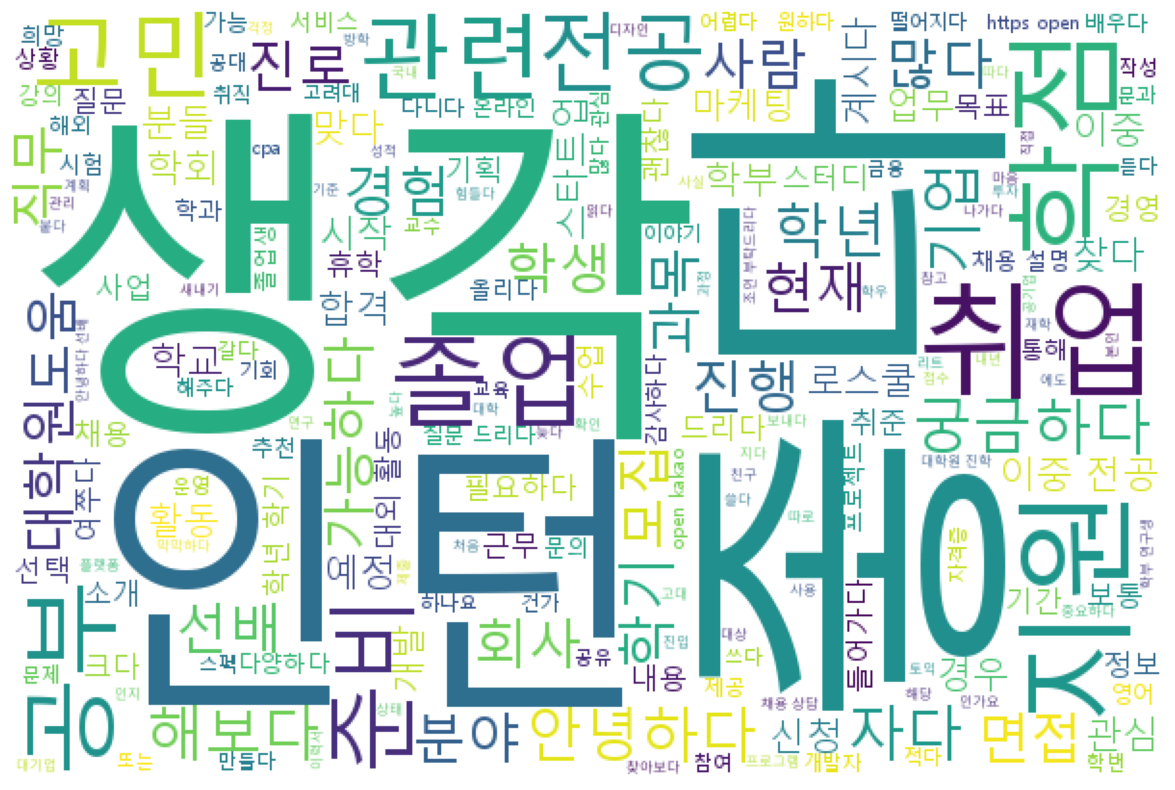

In [336]:
displayWordCloud(data = ' '.join(wordlist), width=600, height=400)

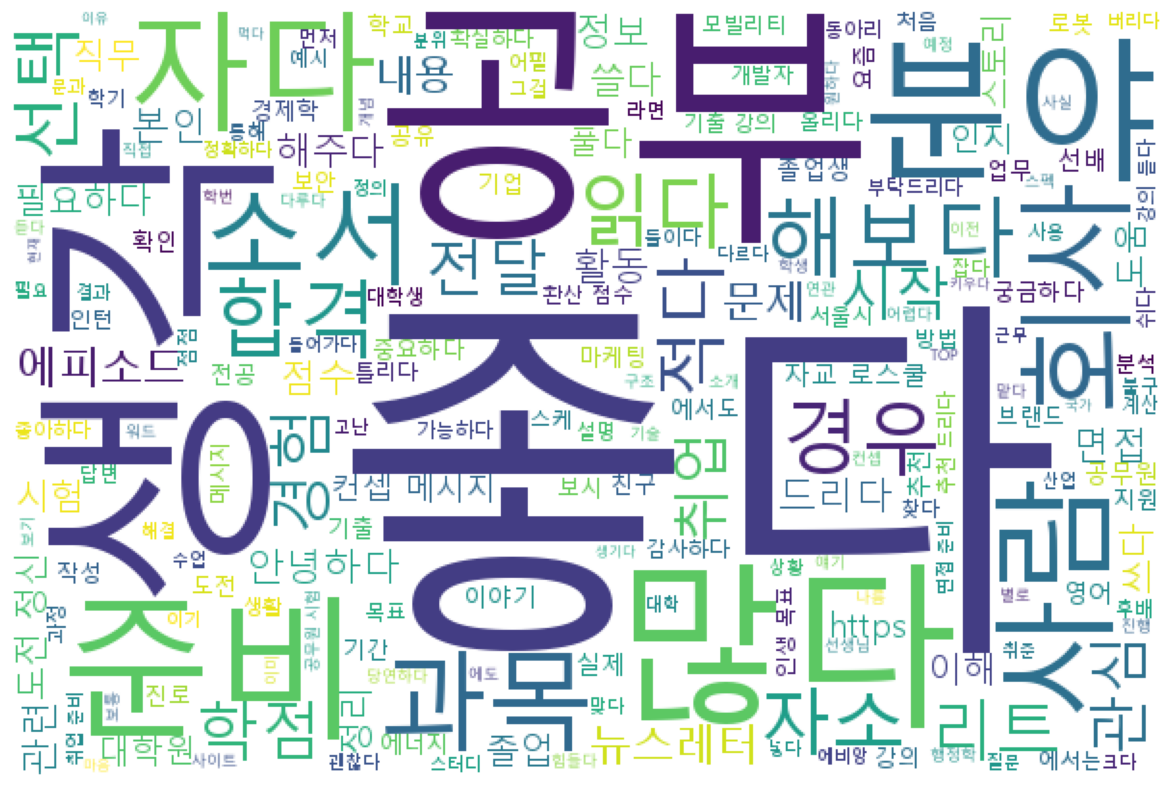

In [362]:
displayWordCloud(data = ' '.join(wordlist_like), width=600, height=400)

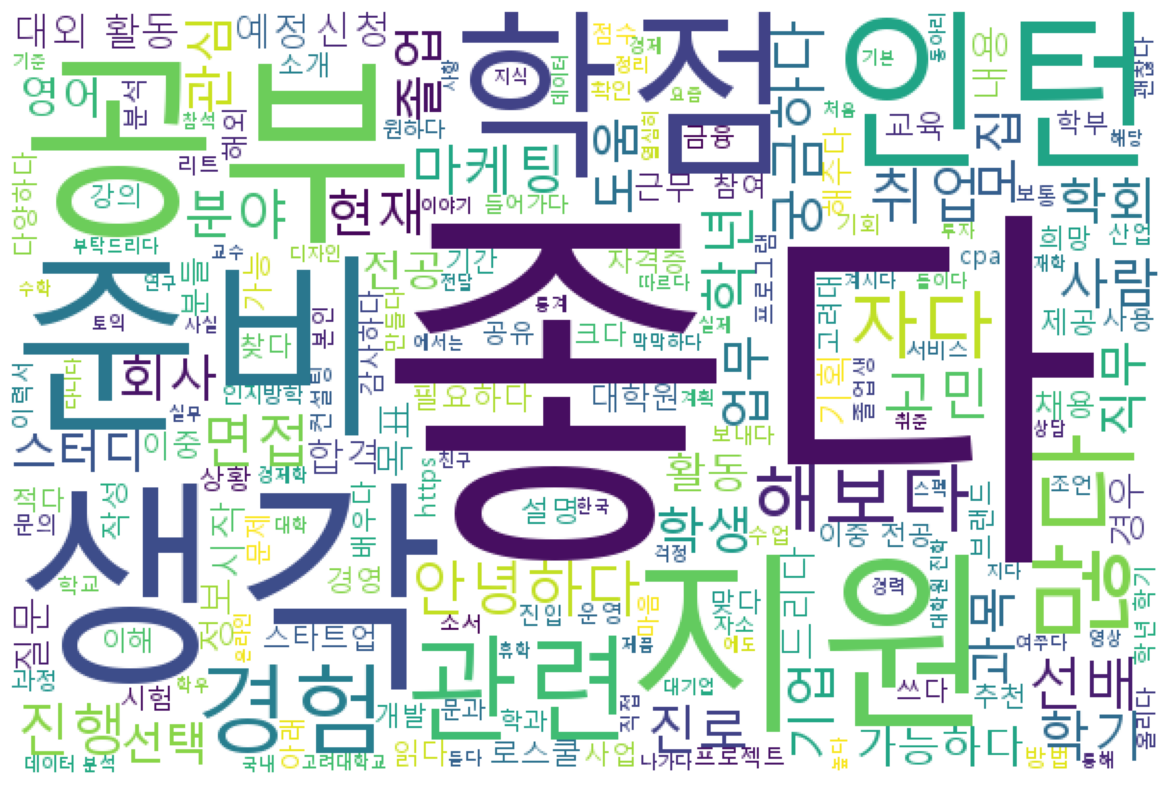

In [363]:
displayWordCloud(data = ' '.join(wordlist_scrap), width=600, height=400)

In [350]:
def vocab_dict(wordlist):
    vocab = []
    length=len(wordlist)
    for i in range(length):
        new_wordlist = wordlist[i].split()        
        for j in new_wordlist:
            vocab.append(j)
    return vocab

In [353]:
all_vocab = vocab_dict(wordlist)

In [354]:
like_vocab = vocab_dict(wordlist_like)

In [355]:
scrap_vocab = vocab_dict(wordlist_scrap)

In [358]:
from collections import Counter
all_freq = Counter(all_vocab)
like_freq = Counter(like_vocab)
scrap_freq = Counter(scrap_vocab)

In [359]:
print(all_freq)

Counter({'ÏßÄÏõê': 572, 'Ïù∏ÌÑ¥': 543, 'Ï§ÄÎπÑ': 521, 'ÌïôÏ†ê': 519, 'Ï†ÑÍ≥µ': 504, 'ÏÉùÍ∞Å': 501, 'ÌïôÍ∏∞': 488, 'Ï±ÑÏö©': 484, 'Ï¢ãÎã§': 476, 'Ï∑®ÏóÖ': 440, 'ÌïôÎÖÑ': 430, 'ÏÑ†Î∞∞': 424, 'Ï°∏ÏóÖ': 418, 'Ïù¥Ï§ë': 413, 'ÏïàÎÖïÌïòÎã§': 408, 'Í¥ÄÎ†®': 369, 'ÎßéÎã§': 367, 'https': 347, 'Î™®Ïßë': 346, 'Í¥ÄÏã¨': 338, 'Í≥µÎ∂Ä': 337, 'Ìï¥Î≥¥Îã§': 316, 'ÎìúÎ¶¨Îã§': 311, 'ÎåÄÌïôÏõê': 307, 'ÏßÑÌñâ': 305, 'Í≥†ÎØº': 300, 'Í∏∞ÏóÖ': 296, 'Í∂ÅÍ∏àÌïòÎã§': 288, 'Î©¥Ï†ë': 279, 'Í≤ΩÌóò': 278, 'Î∂ÄÌÉÅÎìúÎ¶¨Îã§': 278, 'Ìï¥Ï£ºÎã§': 250, 'ÏßàÎ¨∏': 246, 'Í∞ÄÎä•ÌïòÎã§': 237, 'ÏßÑÎ°ú': 237, '00': 234, 'ÏûêÎã§': 233, 'Í∞êÏÇ¨ÌïòÎã§': 232, 'ÌôúÎèô': 229, 'ÏßÅÎ¨¥': 224, 'Ïä§ÌÑ∞Îîî': 222, 'ÏòàÏ†ï': 220, 'ÌòÑÏû¨': 212, 'ÏÑ§Î™Ö': 209, 'Í≤ΩÏòÅ': 206, 'ÌïôÎ∂Ä': 205, 'Î°úÏä§Ïø®': 204, 'com': 203, 'Î∂ÑÎì§': 201, 'ÌöåÏÇ¨': 200, 'ÎèÑÏõÄ': 199, 'ÌïôÌöå': 199, 'ÌïôÏÉù': 193, 'ÏÇ¨Îûå': 189, 'Î∂ÑÏïº': 187, 'Í≥ÑÏãúÎã§': 182, 'Í∞úÎ∞ú': 181, 'Í∑ºÎ¨¥': 181, 'Ïã†Ï≤≠': 177, 'ÎßûÎã§': 174, 'ÏÉÅÎã¥': 171, 'ÏóÖÎ¨¥': 170, 'ÏãúÌóò': 169, 

In [360]:
print(like_freq)

Counter({'Ï¢ãÎã§': 59, 'Ï§ÄÎπÑ': 54, 'Í≥µÎ∂Ä': 53, 'ÏÉùÍ∞Å': 51, 'ÎßéÎã§': 45, 'Î∂ÑÏïº': 43, 'Í∞ïÏùò': 36, 'ÏûêÎã§': 36, 'ÏÜåÏÑú': 36, 'ÏÇ¨Îûå': 34, 'ÏûêÏÜå': 34, 'Ï†êÏàò': 32, 'ÎìúÎ¶¨Îã§': 31, 'ÌöåÏÇ¨': 31, 'Î™©Ìëú': 31, 'Í≥ºÎ™©': 31, 'Î©¥Ï†ë': 30, 'Î°úÏä§Ïø®': 29, 'Ìï¥Î≥¥Îã§': 29, 'ÏÑ†ÌÉù': 28, 'Ìï©Í≤©': 28, 'Ï∑®ÏóÖ': 27, 'ÎèÑÏ†Ñ': 27, 'Í≤ΩÏö∞': 27, 'Í∏∞Ï∂ú': 27, 'Ìï¥Ï£ºÎã§': 26, 'ÏùΩÎã§': 26, 'Ï†ïÎ¶¨': 25, 'Î¨∏Ï†ú': 25, 'ÌïôÏ†ê': 24, 'https': 24, 'Î©îÏãúÏßÄ': 24, 'Ï†ÅÎã§': 24, 'ÎÇ¥Ïö©': 23, 'ÏóêÌîºÏÜåÎìú': 22, 'Ï∂îÏ≤ú': 22, 'ÏãúÌóò': 22, 'Í≤ΩÌóò': 21, 'Ïª®ÏÖâ': 21, 'Î¶¨Ìä∏': 21, 'Í≥µÎ¨¥Ïõê': 20, 'ÎèÑÏõÄ': 20, 'Í¥ÄÏã¨': 19, 'Ï†ÑÎã¨': 19, 'ÏãúÏûë': 19, 'Îâ¥Ïä§Î†àÌÑ∞': 19, 'ÏòÅÏñ¥': 17, 'ÏïàÎÖïÌïòÎã§': 17, 'Î≥∏Ïù∏': 17, 'ÎßûÎã§': 17, 'ÌôúÎèô': 17, 'Ï†ïÏã†': 17, 'Í¥ÄÎ†®': 17, 'Ï†ïÎ≥¥': 16, 'Ïì∞Îã§': 16, 'Ïì∏Îã§': 16, 'ÏûëÏÑ±': 16, 'ÏßÄÏõê': 16, 'ÏóÖÎ¨¥': 16, 'Îì£Îã§': 16, 'Ï°∏ÏóÖ': 15, 'ÌïÑÏöîÌïòÎã§': 15, 'Ïù∏ÏÉù': 15, 'ÎßàÏºÄÌåÖ': 15, 'Ïù¥Ìï¥': 15, 'ÏßÅÎ¨¥': 15, 'ÏûêÍµê': 15, 'ÏßÑÎ°ú':

In [361]:
print(scrap_freq)

Counter({'Ï§ÄÎπÑ': 194, 'Ï¢ãÎã§': 188, 'ÏßÄÏõê': 183, 'ÏÉùÍ∞Å': 176, 'Í≥µÎ∂Ä': 154, 'Ïù∏ÌÑ¥': 148, 'ÎßéÎã§': 140, 'ÏÑ†Î∞∞': 135, 'ÌïôÍ∏∞': 134, 'Í≤ΩÌóò': 133, 'ÌïôÎÖÑ': 131, 'ÌïôÏ†ê': 130, 'Í¥ÄÎ†®': 127, 'ÏßÑÌñâ': 121, 'Ìï¥Î≥¥Îã§': 120, 'ÏïàÎÖïÌïòÎã§': 119, 'ÌôúÎèô': 119, 'Ï†ÑÍ≥µ': 117, 'Î™®Ïßë': 114, 'Ï∑®ÏóÖ': 112, 'Í¥ÄÏã¨': 112, 'ÎìúÎ¶¨Îã§': 107, 'Í∏∞ÏóÖ': 105, 'Î©¥Ï†ë': 105, 'Ïù¥Ï§ë': 102, '00': 96, 'Í≥†ÎØº': 95, 'https': 95, 'ÏûêÎã§': 94, 'Ï±ÑÏö©': 93, 'ÌïôÌöå': 93, 'ÏßÑÎ°ú': 92, 'Î∂ÄÌÉÅÎìúÎ¶¨Îã§': 91, 'ÏóÖÎ¨¥': 91, 'ÎßàÏºÄÌåÖ': 90, 'Í∂ÅÍ∏àÌïòÎã§': 87, 'Î∂ÑÏïº': 87, 'Ìï¥Ï£ºÎã§': 85, 'ÎåÄÌïôÏõê': 85, 'ÏòàÏ†ï': 79, 'ÏÑ§Î™Ö': 78, 'Í∑ºÎ¨¥': 77, 'ÎèÑÏõÄ': 77, 'Í∞êÏÇ¨ÌïòÎã§': 76, 'ÌòÑÏû¨': 75, 'ÏßàÎ¨∏': 75, 'Î°úÏä§Ïø®': 75, 'ÏÇ¨Îûå': 75, 'Ïä§ÌÑ∞Îîî': 73, 'Í≤ΩÏòÅ': 72, 'Î™©Ìëú': 70, 'ÌïôÏÉù': 70, 'ÏòÅÏñ¥': 70, 'Ï°∏ÏóÖ': 69, 'ÌöåÏÇ¨': 68, 'ÎÇ¥Ïö©': 68, 'Í∏∞Í∞Ñ': 67, 'Í∏∞Ìöç': 67, 'Î∂ÑÏÑù': 66, 'ÌïôÎ∂Ä': 65, 'Ï∂îÏ≤ú': 64, 'com': 64, 'ÏßÅÎ¨¥': 64, 'Ïã†Ï≤≠': 63, 'ÏãúÏûë': 63, 'ÏÑ†ÌÉù': 63, 'Ï

In [365]:
!pip install pyLDAvis

     ---------------------------------------- 2.6/2.6 MB 7.5 MB/s eta 0:00:00
     ---------------------------------------- 14.9/14.9 MB 7.3 MB/s eta 0:00:00
     ---------------------------------------- 10.7/10.7 MB 7.4 MB/s eta 0:00:00
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
     ------------------------------------- 341.8/341.8 kB 10.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: pandas
    Found existing installation: pandas 1.4.4
    Uninstalling pandas-1.4.4:
      Successfully uninstalled pandas-1.4.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.24.3 which is incompatible.


In [366]:
import gensim
from gensim.models import LdaModel
import pyLDAvis.gensim
from gensim.models.coherencemodel import CoherenceModel

In [408]:
dic = gensim.corpora.Dictionary([all_vocab])
bow_corpus = [dic.doc2bow(doc) for doc in [all_vocab]]

#mallet_path='mallet'
#ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, 
#                                             corpus=corpus, 
#                                             num_topics=10, 
#                                             id2word=dic)

NUM_TOPICS=5
lda_model =  gensim.models.LdaModel(bow_corpus, 
                    num_topics = NUM_TOPICS, 
                    id2word = dic)
pyLDAvis.enable_notebook()
#result = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)

In [409]:
result = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)
pyLDAvis.display(result)

UnicodeEncodeError: 'ascii' codec can't encode characters in position 18-19: ordinal not in range(128)

In [407]:
for t in lda_model.show_topics():
    print(t)

(0, '0.008*"Ï§ÄÎπÑ" + 0.007*"ÏßÄÏõê" + 0.007*"Ï±ÑÏö©" + 0.006*"ÌïôÍ∏∞" + 0.006*"Ïù∏ÌÑ¥" + 0.006*"ÌïôÎÖÑ" + 0.006*"Ïù¥Ï§ë" + 0.005*"Ï†ÑÍ≥µ" + 0.005*"ÎìúÎ¶¨Îã§" + 0.005*"Ï∑®ÏóÖ"')
(1, '0.007*"ÏßÄÏõê" + 0.007*"ÌïôÏ†ê" + 0.007*"Ï±ÑÏö©" + 0.007*"Ï¢ãÎã§" + 0.006*"ÏïàÎÖïÌïòÎã§" + 0.006*"Ïù∏ÌÑ¥" + 0.006*"Ï§ÄÎπÑ" + 0.006*"ÌïôÍ∏∞" + 0.006*"Ï†ÑÍ≥µ" + 0.006*"ÏÑ†Î∞∞"')
(2, '0.008*"ÏßÄÏõê" + 0.008*"Ï§ÄÎπÑ" + 0.007*"ÏÉùÍ∞Å" + 0.007*"Ïù∏ÌÑ¥" + 0.006*"Ï†ÑÍ≥µ" + 0.006*"ÌïôÎÖÑ" + 0.006*"Ï°∏ÏóÖ" + 0.006*"Ï±ÑÏö©" + 0.005*"Ï¢ãÎã§" + 0.005*"Ïù¥Ï§ë"')
(3, '0.008*"ÌïôÏ†ê" + 0.008*"Ï†ÑÍ≥µ" + 0.007*"ÏÉùÍ∞Å" + 0.007*"Ï∑®ÏóÖ" + 0.006*"Ïù∏ÌÑ¥" + 0.006*"ÌïôÍ∏∞" + 0.006*"ÏÑ†Î∞∞" + 0.005*"ÌïôÎÖÑ" + 0.005*"Ï¢ãÎã§" + 0.005*"Ïù¥Ï§ë"')
(4, '0.007*"Ïù∏ÌÑ¥" + 0.007*"ÏßÄÏõê" + 0.006*"ÌïôÏ†ê" + 0.006*"Ï¢ãÎã§" + 0.006*"ÏÉùÍ∞Å" + 0.006*"ÌïôÍ∏∞" + 0.005*"Ï§ÄÎπÑ" + 0.005*"Ï°∏ÏóÖ" + 0.005*"Ï†ÑÍ≥µ" + 0.005*"ÏïàÎÖïÌïòÎã§"')


In [393]:
import sys
reload(sys)
sys.setdefaultencoding('utf8')

NameError: name 'reload' is not defined

In [ ]:
# Í≥†ÌååÏä§ Î°úÍ∑∏Ïù∏ ÌïòÎäî Í≥ºÏ†ï

driver = webdriver.Chrome(executable_path = "D:/heejun/dev/chromedriver.exe")
driver.implicitly_wait(1)
driver.get('https://www.koreapas.com/bbs/main.php')
driver.find_element(By.NAME,'user_id').send_keys('anthjoon11')
driver.find_element(By.NAME,'password').send_keys('clckflxh00')
login_xpath='/html/body/div/div[5]/div[2]/div/table[2]/tbody/tr/td[2]/form/div/div/input'
driver.find_element(By.XPATH,login_xpath).click()
driver.implicitly_wait(1)

In [ ]:
# Í≥†ÌååÏä§ ÌÅ¨Î°§ÎßÅ
dictionary={} # ÌÅ¨Î°§ÎßÅÌïú textÎì§ÏùÑ Îã¥Í∏∞ ÏúÑÌïú dictionary
page = 0 #ÌéòÏù¥ÏßÄ ÏàúÌôòÏùÑ ÏúÑÌïú count num

title_=[]
content_=[] # Í∏Ä Î≥∏Î¨∏ Îã¥ÏùÑ Î¶¨Ïä§Ìä∏
comment_=[] # ÎåìÍ∏Ä Îã¥ÏùÑ Î¶¨Ïä§Ìä∏
like_=[] # Ï¢ãÏïÑÏöî Ïàò Îã¥ÏùÑ Î¶¨Ïä§Ìä∏
comment_count_=[] # ÎåìÍ∏Ä Ïàò Îã¥ÏùÑ Î¶¨Ïä§Ìä∏
scrap_=[] # Ïä§ÌÅ¨Îû© Ïàò Îã¥ÏùÑ Î¶¨Ïä§Ìä∏

while True:
    print('page '+str(page))
    
    if page > 0:
        break

    page = page+1
    
    driver.get("https://www.koreapas.com/bbs/zboard.php?id=jobs&page={}&category=&dept=&sn=off&ss=on&sc=on&tagkeyword=&keyword=&sn1=&divpage=83".format(str(page)))
    driver.implicitly_wait(1)

    posts = driver.find_elements(By.CSS_SELECTOR, 'tr.class0')
    links = [post.get_attribute('href') for post in posts]


In [15]:
# ÏùΩÏùÄ Ï±Ö Î™©Î°ù ÎπàÎèÑ ÌëúÏãú

data = pd.read_excel('ÏùΩÏùÄÏ±ÖÎ™©Î°ù.xlsx')

In [16]:
# Í≤∞Ï∏°Ïπò Ìñâ Ï†úÍ±∞
data = data.dropna(axis=0)

In [35]:
data

Ï†úÎ™©        Ï†ÄÏûê   Î∂ÑÏïº   ÏùΩÏùÄ ÎÖÑÎèÑ
0                                        ÌïòÏñÄÏÑ±    Ïò§Î•¥Ìïú ÌååÎ¨µ   Î¨∏Ìïô  2016.0
1                                       ÎèôÎ¨ºÎÜçÏû•      Ï°∞ÏßÄÏò§Ïõ∞   Î¨∏Ìïô  2016.0
2                           Ïπ¥ÌÉÄÎ¶¨ÎÇò Î∏îÎ£∏Ïùò ÏûÉÏñ¥Î≤ÑÎ¶∞ Î™ÖÏòà    ÌïòÏù∏Î¶¨Ìûà Îµê   Î¨∏Ìïô  2016.0
3                                    ÏúÑÎåÄÌïú Í∞úÏ∏†ÎπÑ  Ïä§ÏΩß ÌîºÏ∏†Ï†úÎü¥Îìú   Î¨∏Ìïô  2016.0
4                                       Ìå©Ìä∏Ï≤¥ÌÅ¨   JTBCÎâ¥Ïä§Î£∏   Ïñ∏Î°†  2016.0
..                                       ...       ...  ...     ...
115                      ÌååÏù¥Ïç¨ ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º ÌôúÏö©Ìïú Î®∏Ïã†Îü¨Îãù  ÏïàÎìúÎ†àÏïÑÏä§ ÎÆêÎü¨  Îç∞Ïù¥ÌÑ∞  2022.0
117                                Ïã§Ï†Ñ ÏãúÍ≥ÑÏó¥ Î∂ÑÏÑù    ÏóêÏùºÎ¶∞ ÎãêÏä®   ÏàòÌïô  2023.0
118        calculus essential for statistics   ÌóàÎ™ÖÌöå Ïô∏ 1   ÏàòÌïô  2023.0
119  essential of probability for statistics       ÏµúÌÉúÎ†®   ÏàòÌïô  2023.0
120                        Îî•Îü¨ÎãùÏùÑ Ïù¥Ïö©Ìïú ÏûêÏó∞Ïñ¥Ï≤òÎ¶¨ ÏûÖÎ¨∏   ÏïàÏÉÅÏ§Ä Ïô∏ 1  Îç∞Ïù¥ÌÑ∞  2023.0

[116 rows x 4 columns]

<AxesSubplot:>

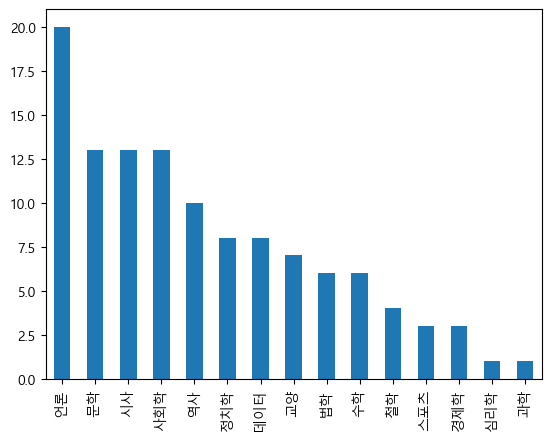

In [63]:
import matplotlib

matplotlib.rcParams['font.family'] ='Malgun Gothic'

matplotlib.rcParams['axes.unicode_minus'] =False

data['Î∂ÑÏïº'].value_counts().plot.bar()

Text(0.5, 1.0, '2016ÎÖÑ ÏùΩÏùÄ Ï±Ö Ìï≠Î™©Î≥Ñ ÎπÑÏ§ë')

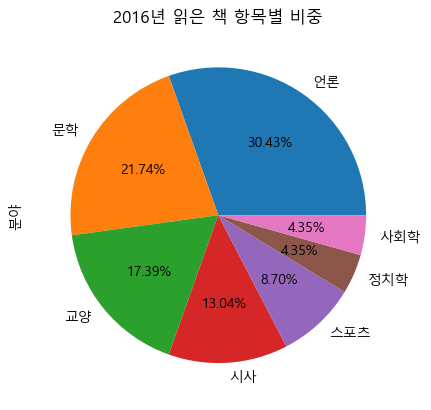

In [53]:
year = data[data['ÏùΩÏùÄ ÎÖÑÎèÑ']==2016]
year['Î∂ÑÏïº'].value_counts().plot.pie(autopct=lambda p : '{:.2f}%'.format(p))
plt.title('2016ÎÖÑ ÏùΩÏùÄ Ï±Ö Ìï≠Î™©Î≥Ñ ÎπÑÏ§ë')

Text(0.5, 1.0, '2017ÎÖÑ ÏùΩÏùÄ Ï±Ö Ìï≠Î™©Î≥Ñ ÎπÑÏ§ë')

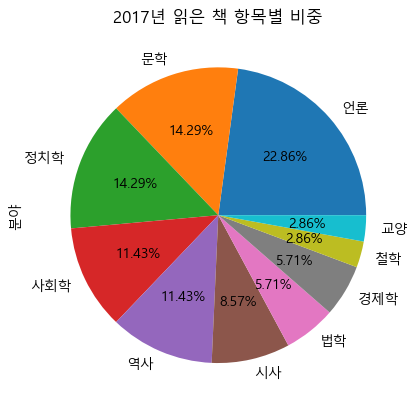

In [54]:
year = data[data['ÏùΩÏùÄ ÎÖÑÎèÑ']==2017]
year['Î∂ÑÏïº'].value_counts().plot.pie(autopct=lambda p : '{:.2f}%'.format(p))
plt.title('2017ÎÖÑ ÏùΩÏùÄ Ï±Ö Ìï≠Î™©Î≥Ñ ÎπÑÏ§ë')

Text(0.5, 1.0, '2018ÎÖÑ ÏùΩÏùÄ Ï±Ö Ìï≠Î™©Î≥Ñ ÎπÑÏ§ë')

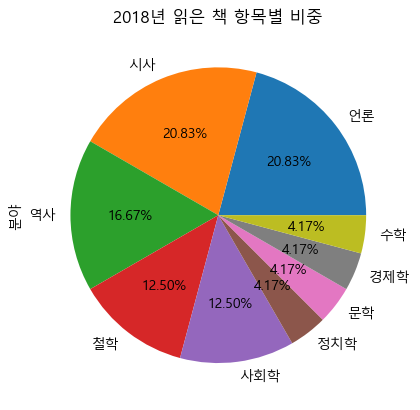

In [55]:
year = data[data['ÏùΩÏùÄ ÎÖÑÎèÑ']==2018]
year['Î∂ÑÏïº'].value_counts().plot.pie(autopct=lambda p : '{:.2f}%'.format(p))
plt.title('2018ÎÖÑ ÏùΩÏùÄ Ï±Ö Ìï≠Î™©Î≥Ñ ÎπÑÏ§ë')

Text(0.5, 1.0, '2019ÎÖÑ ÏùΩÏùÄ Ï±Ö Ìï≠Î™©Î≥Ñ ÎπÑÏ§ë')

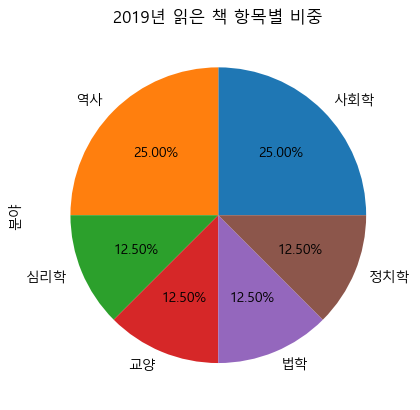

In [58]:
year = data[data['ÏùΩÏùÄ ÎÖÑÎèÑ']==2019]
year['Î∂ÑÏïº'].value_counts().plot.pie(autopct=lambda p : '{:.2f}%'.format(p))
plt.title('2019ÎÖÑ ÏùΩÏùÄ Ï±Ö Ìï≠Î™©Î≥Ñ ÎπÑÏ§ë')

Text(0.5, 1.0, '2020ÎÖÑ ÏùΩÏùÄ Ï±Ö Ìï≠Î™©Î≥Ñ ÎπÑÏ§ë')

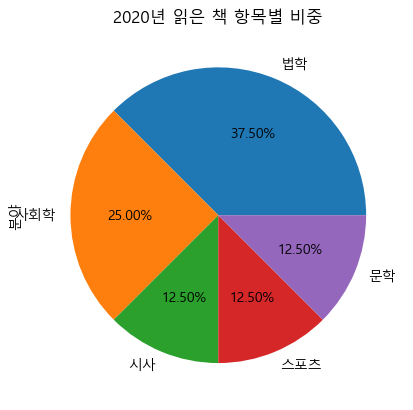

In [57]:
year = data[data['ÏùΩÏùÄ ÎÖÑÎèÑ']==2020]
year['Î∂ÑÏïº'].value_counts().plot.pie(autopct=lambda p : '{:.2f}%'.format(p))
plt.title('2020ÎÖÑ ÏùΩÏùÄ Ï±Ö Ìï≠Î™©Î≥Ñ ÎπÑÏ§ë')

Text(0.5, 1.0, '2021ÎÖÑ ÏùΩÏùÄ Ï±Ö Ìï≠Î™©Î≥Ñ ÎπÑÏ§ë')

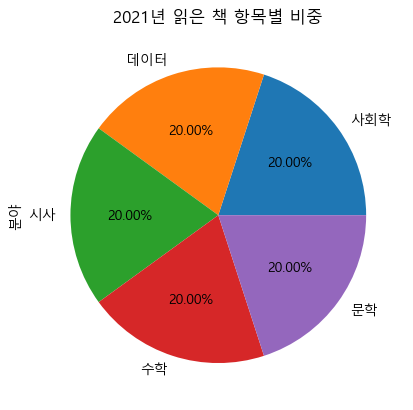

In [59]:
year = data[data['ÏùΩÏùÄ ÎÖÑÎèÑ']==2021]
year['Î∂ÑÏïº'].value_counts().plot.pie(autopct=lambda p : '{:.2f}%'.format(p))
plt.title('2021ÎÖÑ ÏùΩÏùÄ Ï±Ö Ìï≠Î™©Î≥Ñ ÎπÑÏ§ë')

Text(0.5, 1.0, '2022ÎÖÑ ÏùΩÏùÄ Ï±Ö Ìï≠Î™©Î≥Ñ ÎπÑÏ§ë')

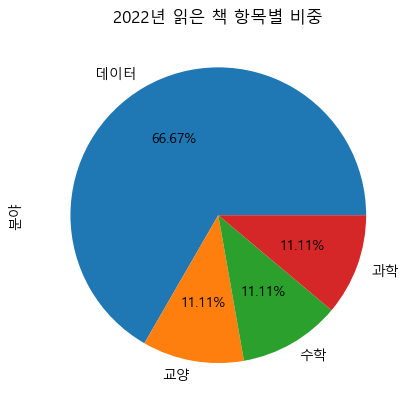

In [60]:
year = data[data['ÏùΩÏùÄ ÎÖÑÎèÑ']==2022]
year['Î∂ÑÏïº'].value_counts().plot.pie(autopct=lambda p : '{:.2f}%'.format(p))
plt.title('2022ÎÖÑ ÏùΩÏùÄ Ï±Ö Ìï≠Î™©Î≥Ñ ÎπÑÏ§ë')

Text(0.5, 1.0, '2023ÎÖÑ ÏùΩÏùÄ Ï±Ö Ìï≠Î™©Î≥Ñ ÎπÑÏ§ë')

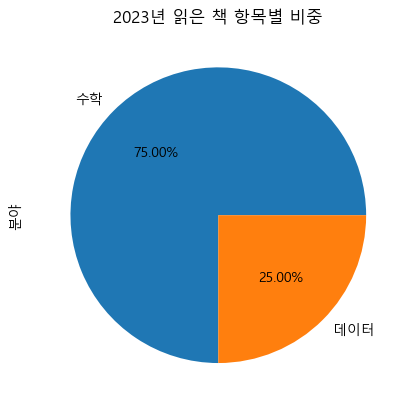

In [61]:
year = data[data['ÏùΩÏùÄ ÎÖÑÎèÑ']==2023]
year['Î∂ÑÏïº'].value_counts().plot.pie(autopct=lambda p : '{:.2f}%'.format(p))
plt.title('2023ÎÖÑ ÏùΩÏùÄ Ï±Ö Ìï≠Î™©Î≥Ñ ÎπÑÏ§ë')

In [64]:
insta = pd.read_excel('ÌåîÎ°úÏõåÎ™©Î°ù.xlsx')

Text(0.5, 1.0, 'Ïù∏Ïä§ÌÉÄ ÌåîÎ°úÏûâ Ìï≠Î™©Î≥Ñ ÎπÑÏ§ë')

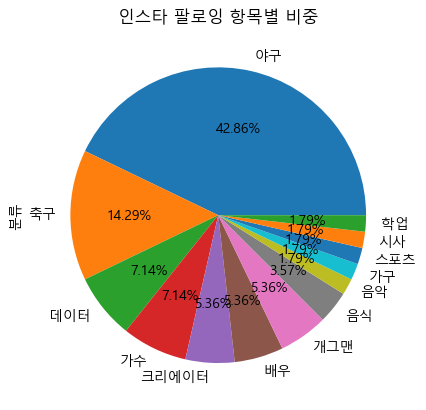

In [67]:
insta['Î∂ÑÎ•ò'].value_counts().plot.pie(autopct=lambda p : '{:.2f}%'.format(p))
plt.title('Ïù∏Ïä§ÌÉÄ ÌåîÎ°úÏûâ Ìï≠Î™©Î≥Ñ ÎπÑÏ§ë')

Text(0.5, 1.0, 'Ïù∏Ïä§ÌÉÄ ÌåîÎ°úÏûâ Ìï≠Î™©Î≥Ñ ÎπàÎèÑÏàò')

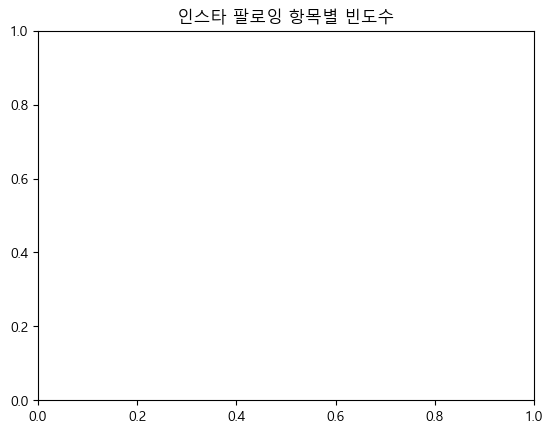

In [70]:
insta['Î∂ÑÎ•ò'].value_counts().plot.bar
plt.title('Ïù∏Ïä§ÌÉÄ ÌåîÎ°úÏûâ Ìï≠Î™©Î≥Ñ ÎπàÎèÑÏàò')

In [69]:
insta

Í≥ÑÏ†ïÎ™Ö                    Ïù¥Î¶Ñ     Î∂ÑÎ•ò
0                 harrykane            Harry kane     Ï∂ïÍµ¨
1             premierleague        Premier League     Ï∂ïÍµ¨
2              shoheiothani         Shohei Ohtani     ÏïºÍµ¨
3                deep.daive          Ïù∏Í≥µÏßÄÎä•/Îî•Îü¨Îãù Ìä∏Î†åÎìú    Îç∞Ïù¥ÌÑ∞
4                 hansal___                  ÌïúÏÇ¥Ï∞®Ïù¥  ÌÅ¨Î¶¨ÏóêÏù¥ÌÑ∞
5                    pd_jwp                   Î∞ïÏ¢ÖÏö±     ÏùåÏïÖ
6            kubig.offiical  Í≥†Î†§ÎåÄÌïôÍµê Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïù¥Ïñ∏Ïä§ ÌïôÌöå:Ïø†ÎπÖ    Îç∞Ïù¥ÌÑ∞
7           pockets_storage                   Ìè¨ÏºÄÏ∏†     Í∞ÄÍµ¨
8             sportsjobalio               Ïä§Ìè¨Ï∏†Ïû°ÏïåÎ¶¨Ïò§    Ïä§Ìè¨Ï∏†
9                  moonbdns                   Î¨∏ÏÉÅÌõà  ÌÅ¨Î¶¨ÏóêÏù¥ÌÑ∞
10                 amujunsu                  ÏïÑÎ¨¥Ï§ÄÏàò    Îç∞Ïù¥ÌÑ∞
11           waterglasstoon                 Îç∞Î∏å Í≤ΩÏàò    Îç∞Ïù¥ÌÑ∞
12        kanginleeofficial                   Ïù¥Í∞ïÏù∏     Ï∂ïÍµ¨
13                  whrbtjd                   Ï°∞Í∑úÏÑ±     Ï∂ïÍµ¨
14             cheoooool_13                   Ïú§ÏòÅÏ≤†     ÏïºÍµ¨
15                _anwoojin                   ÏïàÏö∞ÏßÑ     ÏïºÍµ¨
16                   thekfa      ÎåÄÌïúÎØºÍµ≠ Ï∂ïÍµ¨ Íµ≠Í∞ÄÎåÄÌëúÌåÄ Í≥ÑÏ†ï     Ï∂ïÍµ¨
17             nangmanyakku                  ÎÇ≠ÎßåÏïºÍµ¨     ÏïºÍµ¨
18                   padres      San Diego Padres     ÏïºÍµ¨
19                   hhh_07                   ÍπÄÌïòÏÑ±     ÏïºÍµ¨
20          all.about.seoul            ÏÑúÏö∏ÏóêÏÑú Î≠ê ÌïòÏßÄ?     ÏùåÏãù
21                bbangthug                ÎπµÎ®πÎã§ÏÇ¥Ï∞êÎñ°  ÌÅ¨Î¶¨ÏóêÏù¥ÌÑ∞
22                  do_0000                   ÍπÄÎèÑÏòÅ     ÏïºÍµ¨
23                 or___and                  Ïò§ÏñºÏï§Îìú     ÏùåÏãù
24              boyoung0212                   Î∞ïÎ≥¥ÏòÅ     Î∞∞Ïö∞
25                  meenoie                meenoi     Í∞ÄÏàò
26  ilovebaseball_since2009              ÏïÑÏù¥Îü¨Î∏åÎ≤†Ïù¥Ïä§Î≥º     ÏïºÍµ¨
27                 yagongso                 ÏïºÍµ¨Í≥µÏûëÏÜå     ÏïºÍµ¨
28                  2euliee                   Ïù¥ÏùòÎ¶¨     ÏïºÍµ¨
29             stacy_highup                 STAYC     Í∞ÄÏàò
30                      mlb                   MLB     ÏïºÍµ¨
31             kbo_marketer           KBO ÎåÄÌïôÏÉù ÎßàÏºÄÌÑ∞     ÏïºÍµ¨
32            Cchanhopark61                   Î∞ïÏ∞¨Ìò∏     ÏïºÍµ¨
33        kimteari_official                   ÍπÄÌÉúÎ¶¨     Î∞∞Ïö∞
34                mlb.korea             MLB Korea     ÏïºÍµ¨
35                 jsomin86                   Ï†ÑÏÜåÎØº     Î∞∞Ïö∞
36               yangse2848                   ÏñëÏÑ∏Ï∞¨    Í∞úÍ∑∏Îß®
37               quanhaha79                    ÌïòÌïò    Í∞úÍ∑∏Îß®
38              hoohoohoo__                   Ïù¥Ï†ïÌõÑ     ÏïºÍµ¨
39               ilil_ilsik      1Ïùº1Ïãù: ÌïòÎ£®Ïóê ÌïòÎÇòÏùò ÏßÄÏãù     ÏãúÏÇ¨
40          yachin_official                  ÏïºÍµ¨ÏπúÍµ¨     ÏïºÍµ¨
41             kbo.official                   KBO     ÏïºÍµ¨
42                    woo0c                   Ï†ïÏö∞ÏòÅ     ÏïºÍµ¨
43            hyunjinryu325                   Î•òÌòÑÏßÑ     ÏïºÍµ¨
44           yangyang545454                   ÏñëÌòÑÏ¢Ö     ÏïºÍµ¨
45             ye._.vely618                    ÏïÑÎ¶∞     Í∞ÄÏàò
46                 jangsk83                   Ïû•ÏÑ±Í∑ú    Í∞úÍ∑∏Îß®
47                chano__ss                   Î∞ïÏ∞¨Ìò∏     ÏïºÍµ¨
48                 ki_young                   ÏûÑÍ∏∞ÏòÅ     ÏïºÍµ¨
49                31_____jp                   Î∞ïÏ§ÄÌëú     ÏïºÍµ¨
50        always_kia_tigers               Í∏∞ÏïÑ ÌÉÄÏù¥Í±∞Ï¶à     ÏïºÍµ¨
51                  dlwlrma                Ïù¥ÏßÄÍ∏à IU     Í∞ÄÏàò
52       koreauniv.official            Í≥†Î†§ÎåÄÌïôÍµê Í≥µÏãùÍ≥ÑÏ†ï     ÌïôÏóÖ
53              waynerooney          Wayne Rooney     Ï∂ïÍµ¨
54                  hm_son7                   ÏÜêÌù•ÎØº     Ï∂ïÍµ¨
55            spursofficial     Tottenham Hotspur     Ï∂ïÍµ¨